# Brain tumor detection using CNN Model

### IMPORTING  THE  LIBRARIES



In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


### SETTING UP THE DATASET PATHS AND DIRECTORIES 


In [4]:
# Set the path to the dataset
dataset_path = "/kaggle/input/brain-tumor-mri-dataset"

# Define the training and testing directories
train_dir = os.path.join(dataset_path, "/kaggle/input/brain-tumor-mri-dataset/Training")
test_dir = os.path.join(dataset_path, "/kaggle/input/brain-tumor-mri-dataset/Testing")

# Define the categories
categories = ["glioma", "meningioma", "notumor", "pituitary"]


### LOADING AND PREPROCESSING THE DATASET



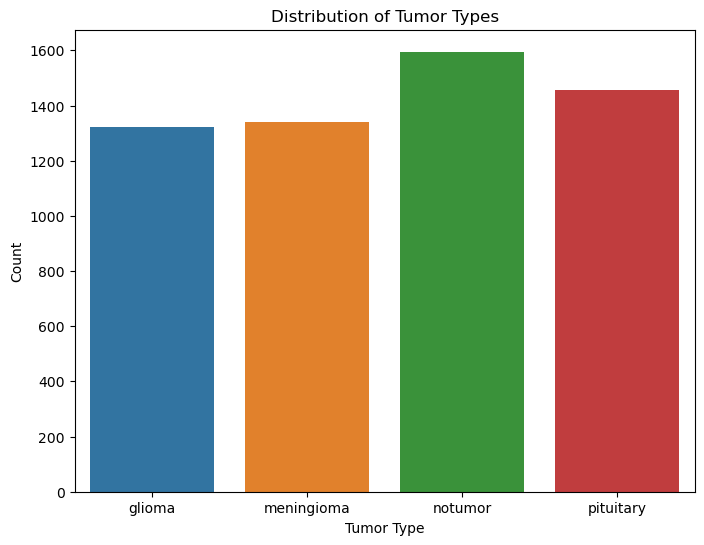

In [5]:
# Load and preprocess the dataset
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


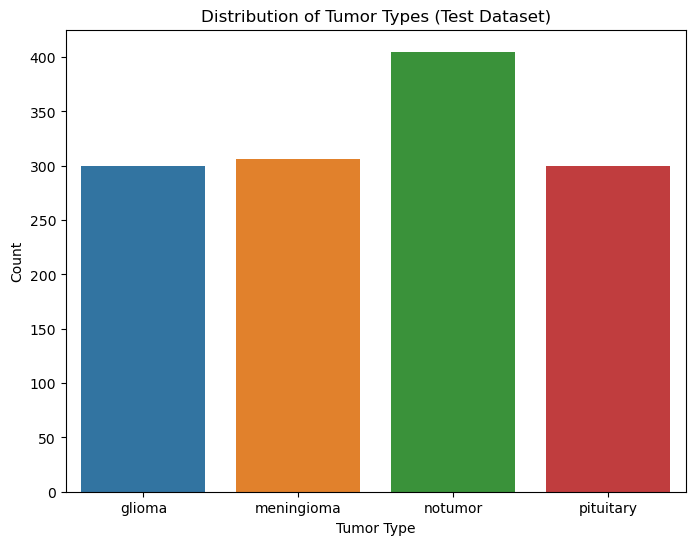

In [6]:
test_data = []
for category in categories:
    folder_path = os.path.join(test_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    test_data.append(
        pd.DataFrame({
            "Image": images,
            "Category": [category] * count,
            "Count": [count] * count
        })
    )

test_df = pd.concat(test_data, ignore_index=True)

# Visualize the distribution of tumor types in the testing dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=test_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types (Test Dataset)")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()


###  VISUALIZING IMAGES FOR EACH TUMOR TYPES



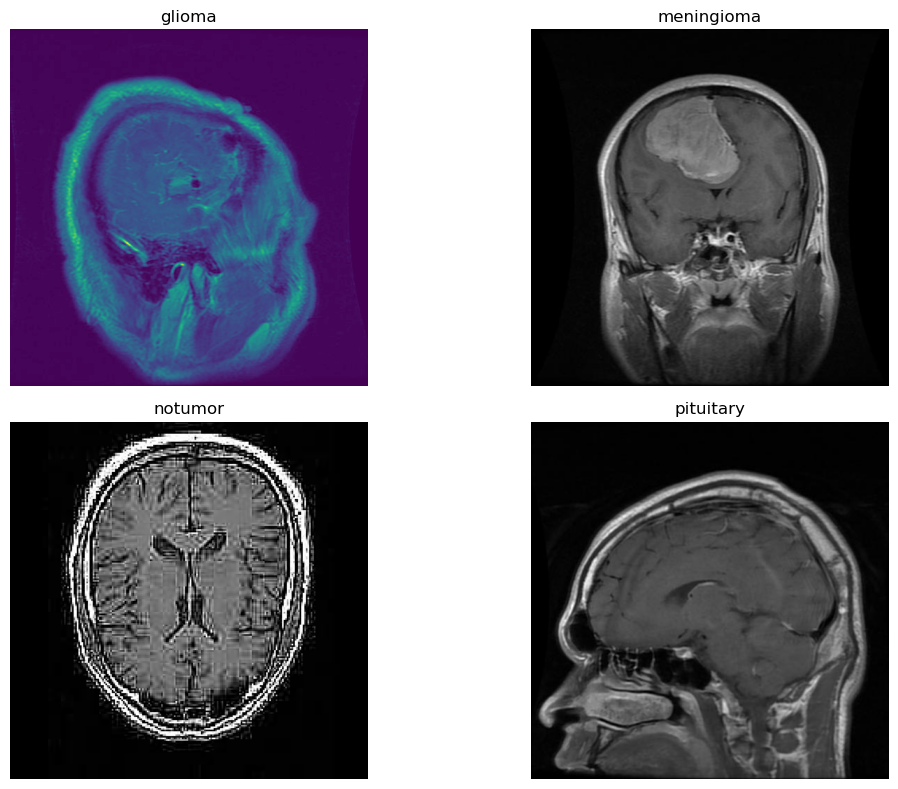

In [7]:
# Visualize sample images for each tumor type
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

### DATA AUGMENTATION AND PREPROCESSING

In [9]:
# Set the image size
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 50

In [10]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)
labels =train_generator.class_indices
print("Class Labels:", labels)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.
Class Labels: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


### BUILDING THE MODEL ARTITECHURE

In [12]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(image_size[0], image_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

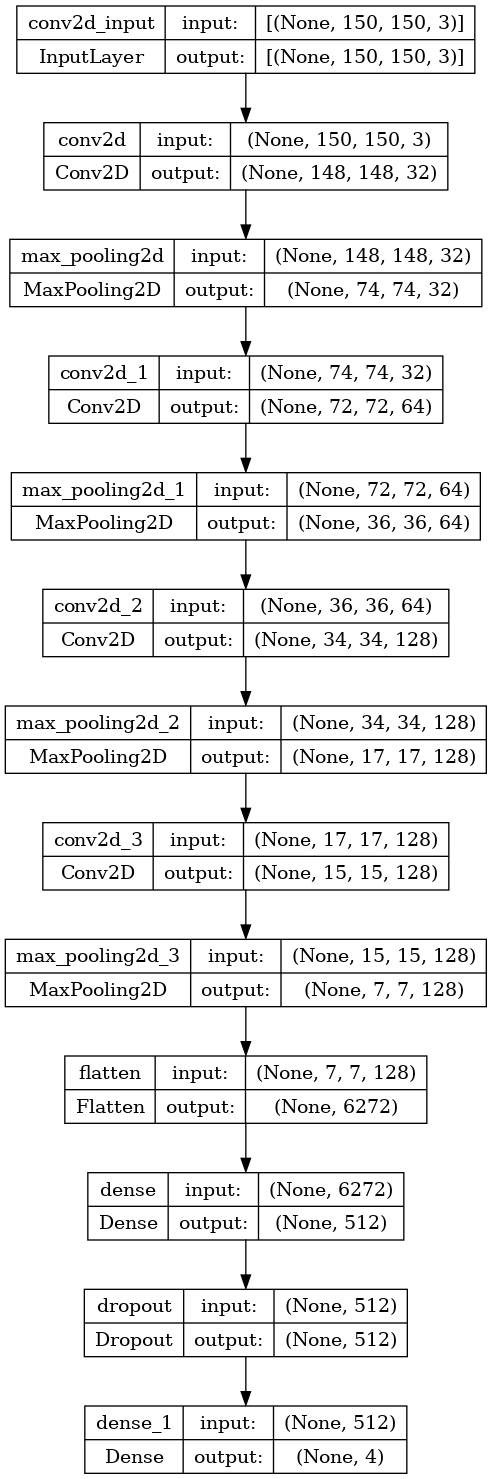

In [13]:
from tensorflow import keras
keras.utils.plot_model(model, show_shapes=True)

In [14]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/50
178/178 [==============================] - 86s 419ms/step - loss: 0.9137 - accuracy: 0.6079 - val_loss: 1.2929 - val_accuracy: 0.5359
Epoch 2/50
178/178 [==============================] - 43s 242ms/step - loss: 0.7196 - accuracy: 0.7211 - val_loss: 1.0061 - val_accuracy: 0.6180
Epoch 3/50
178/178 [==============================] - 43s 243ms/step - loss: 0.6395 - accuracy: 0.7521 - val_loss: 0.6810 - val_accuracy: 0.7281
Epoch 4/50
178/178 [==============================] - 42s 238ms/step - loss: 0.5641 - accuracy: 0.7819 - val_loss: 1.0890 - val_accuracy: 0.5633
Epoch 5/50
178/178 [==============================] - 44s 246ms/step - loss: 0.5269 - accuracy: 0.7926 - val_loss: 0.5989 - val_accuracy: 0.7773
Epoch 6/50
178/178 [==============================] - 43s 244ms/step - loss: 0.5043 - accuracy: 0.8081 - val_loss: 0.4503 - val_accuracy: 0.8164
Epoch 7/50
178/178 [==============================] - 43s 242ms/step - loss: 0.4407 - accuracy: 0.8403 - val_loss: 0.4546 - val_ac

### VISUALIZATION THROUGH GRAPH

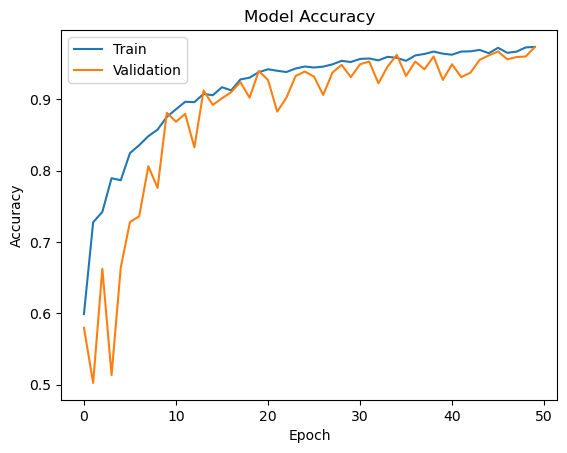

In [10]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

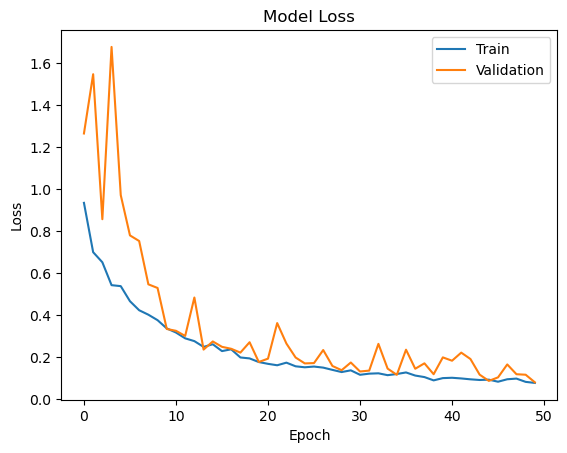

In [11]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

### EVALUATION

In [15]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 [==============================] - 4s 88ms/step - loss: 0.0575 - accuracy: 0.9773
Test Loss: 0.05749046057462692
Test Accuracy: 0.977343738079071


### CONFUSION MATRIX AND EXPLANATION

41/41 [==============================] - 3s 73ms/step


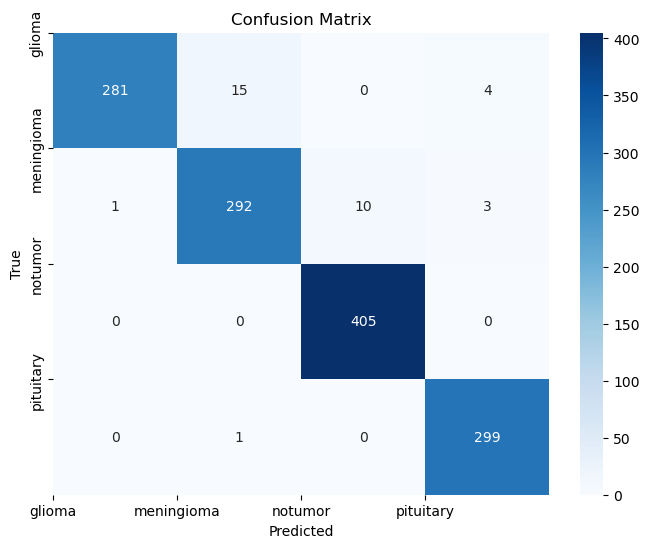

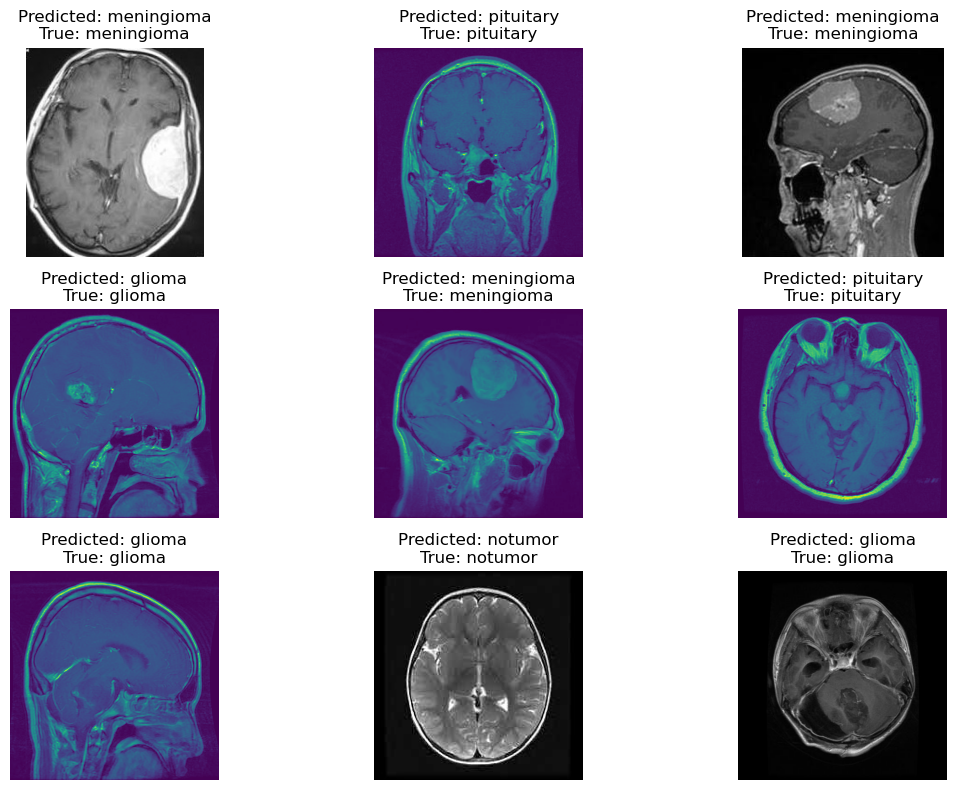

In [13]:
# Make predictions on the test dataset
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


Class: glioma
Precision: 0.9964539007092199
Recall: 0.9366666666666666
F1-Score: 0.9656357388316151

Class: meningioma
Precision: 0.948051948051948
Recall: 0.954248366013072
F1-Score: 0.9511400651465798

Class: notumor
Precision: 0.9759036144578314
Recall: 1.0
F1-Score: 0.9878048780487805

Class: pituitary
Precision: 0.9771241830065359
Recall: 0.9966666666666667
F1-Score: 0.9867986798679869



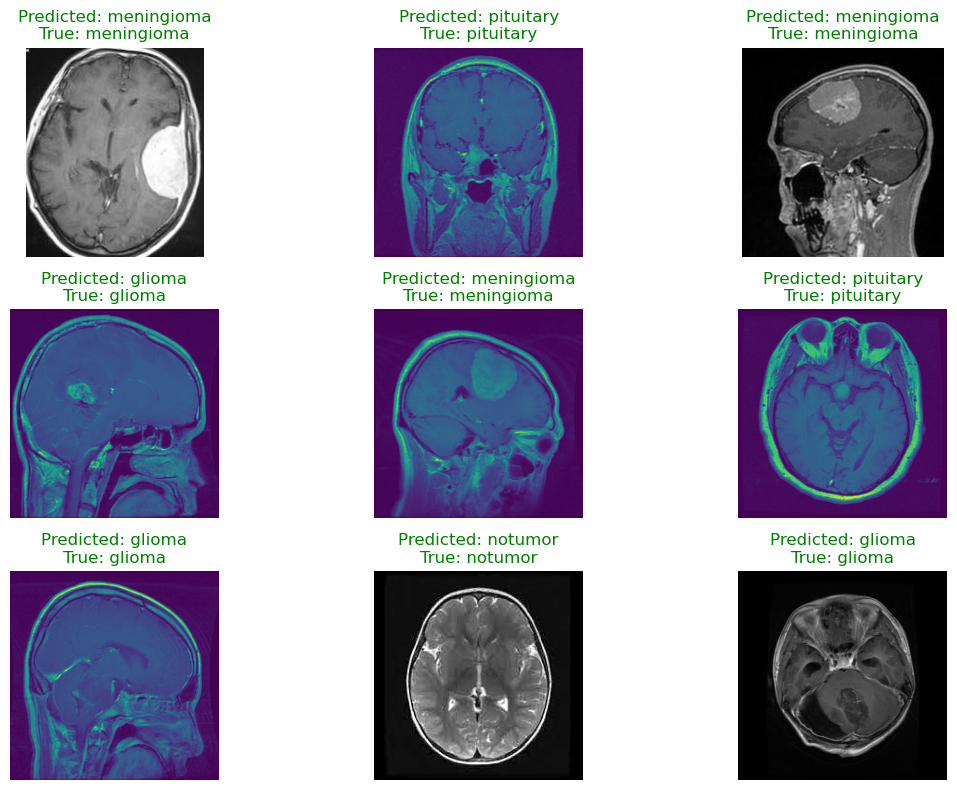

In [14]:
# Calculate precision, recall, and F1-score from the confusion matrix
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [54]:
# Save the trained model
model.save("brain_tumor_detection_model.h5")


In [53]:
 from keras import utils
 import numpy as np


test_image = utils.load_img(
    "/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0014.jpg",
    target_size=image_size 
)

test_image = utils.img_to_array(test_image) / 255.0
test_image = np.expand_dims(test_image, axis=0)

predicted_indice_arr = model.predict(test_image)
prediction = np.argmax(predicted_indice_arr, axis=1)

final_prediction = [key for key, val in labels.items() if val == prediction[0]]
print(final_prediction)

1/1 [==============================] - 0s 26ms/step
['glioma']
